In [19]:
import pandas as pd
df = pd.read_csv("Data/samsung.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

# 2022년전까지 train, 2022년후부터 test
train = df[df.index.year < 2022]
test = df[df.index.year >= 2022]

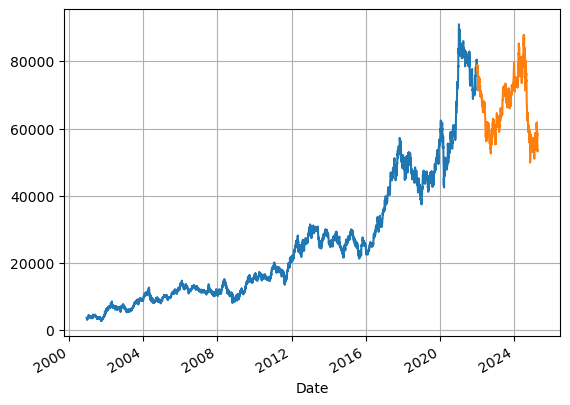

In [25]:
import matplotlib.pyplot as plt

train["Close"].plot()
test["Close"].plot()
plt.grid()
plt.show()

In [38]:
# 5일치씩 묶어서 평균냄
df["MA5"] = df["Close"].rolling(window = 5).mean()
df["MA20"] = df["Close"].rolling(window = 20).mean()
df["MA60"] = df["Close"].rolling(window = 60).mean()
df["MA120"] = df["Close"].rolling(window = 120).mean()

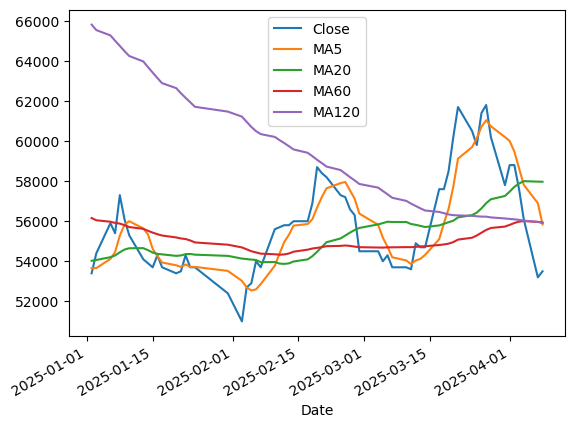

In [40]:
# 2025년을 기준으로 확인해보면
df2 = df[df.index.year >= 2025]
df2["Close"].plot()
df2["MA5"].plot()
df2["MA20"].plot()
df2["MA60"].plot()
df2["MA120"].plot()
plt.legend(["Close", "MA5", "MA20", "MA60", "MA120"])
plt.show()

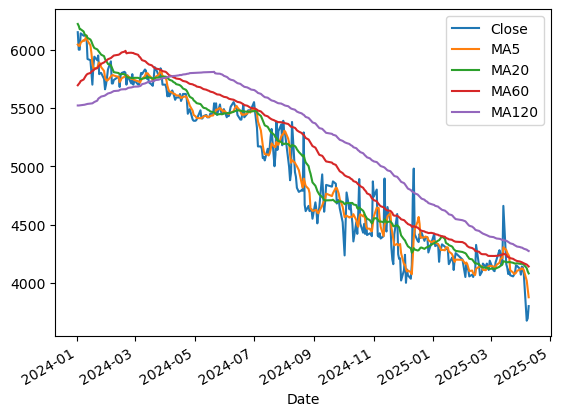

In [62]:
df2 = df[df.index.year >= 2024]
df2["Close"].plot()
df2["MA5"].plot()
df2["MA20"].plot()
df2["MA60"].plot()
df2["MA120"].plot()
plt.legend(["Close", "MA5", "MA20", "MA60", "MA120"])
plt.show()

### "120 < 60 < 20 < 5 < 현재" 이면 상승추세를 보이고 있다는것

In [42]:
A = df.iloc[-1]
A["MA120"] < A["MA60"] < A["MA20"] < A["MA5"] < A["Close"]

False

In [49]:
# !pip install Finance-Datareader
# import FinanceDataReader as fdr

stocks = fdr.StockListing("KOSPI")
stocks.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,53400,2,-100,-0.19,53300,54300,53200,13219303,710084548200,316108665034800,5919637922,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,164100,2,-5400,-3.19,170000,170000,164100,3895322,648655040700,119465188096500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,318000,3,0,0.00,317000,325000,314500,200143,64023282500,74412000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,993000,2,-11000,-1.10,998000,1008000,993000,64915,64819387000,70675782000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,179000,2,-200,-0.11,177500,180900,177300,464409,83265487200,37485498189000,209416191,STK


In [53]:
# 네이버증권의 모든 상승장인 주식 크롤링 가능

import time
for i in range(len(stocks)):
    row = stocks.iloc[i]
    code = row["Code"]
    name = row["Name"]
    df = fdr.DataReader("NAVER:" + code)

    df["MA5"] = df["Close"].rolling(window = 5).mean()
    df["MA20"] = df["Close"].rolling(window = 20).mean()
    df["MA60"] = df["Close"].rolling(window = 60).mean()
    df["MA120"] = df["Close"].rolling(window = 120).mean()
    
    A = df.iloc[-1]
    if A["MA120"] < A["MA60"] < A["MA20"] < A["MA5"] < A["Close"]:
        print(name)
    time.sleep(1)

현대건설
한국카본
대상홀딩스
스틱인베스트먼트
오리엔트바이오
일성건설
동양철관
계룡건설
평화홀딩스
미창석유
대호에이엘
형지엘리트
한국특강
영보화학
신송홀딩스
인터지스
이스타코
화천기계
에넥스
아센디오
한솔PNS
전방
태양금속우
흥국화재우
깨끗한나라우
